(quickstart)=

# Quickstart

In [1]:
%config InlineBackend.figure_format = "png"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 300

rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "dejavuserif"

To get you started, here’s an annotated, fully-functional example that demonstrates the usage of pyLick using a spectrum of an individual galaxy taken from the LEGA-C DR3 survey (data from the [ESO portal](https://eso.org/rm/publicAccess#/dataReleases); data release paper: [van der Wel et al., 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..256...44V/abstract)).

The first thing that we need to do is to import the necessary modules: 
- `os` and `pylick.io` to deal with data I/O,
- `numpy` to perform spectrum manipulation,
- the `Galaxy` class to measure spectral indices.

In [2]:
import os
import numpy as np
import pylick.io as io 
import pylick.plot as plot
from pylick.analysis import Galaxy

Then, we create a folder and download a LEGA-C DR3 (van de Wel et al. 2021) spectrum from the ESO archive.

In [3]:
dir_data = os.path.dirname(io.__file__) + "/../docs/tutorials/data/"

# Test with different galaxies!
k = 2

if k==0:
    # ID M10_213772
    filename = "legac_M10_213772_v3.0.fits"
    os.system("wget https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:33:58.941 -P {:s} >/dev/null 2>&1".format(dir_data))
    os.system("mv {:s}/ADP.2021-07-29T07:33:58.941 {:s}/{:s}".format(dir_data,dir_data,filename))
    z = 0.6999

elif k==1:
    # ID M11_217260
    filename = "legac_M11_217260_v3.0.fits"
    os.system("wget https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:33:59.128 -P {:s} >/dev/null 2>&1".format(dir_data))
    os.system("mv {:s}/ADP.2021-07-29T07:33:59.128 {:s}/{:s}".format(dir_data,dir_data,filename))
    z = 0.6987

elif k==2:
    # ID M2_132048
    filename = "legac_M2_132048_v3.0.fits"
    os.system("wget https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:34:01.368 -P {:s} >/dev/null 2>&1".format(dir_data))
    os.system("mv {:s}/ADP.2021-07-29T07:34:01.368 {:s}/{:s}".format(dir_data,dir_data,filename))
    z= 0.6686

We load the *.fits* spectrum by using the `io.load_spec_fits()` function. The spectrum is assumed to be (and usually it is) at the 1st extension of the Header Data Unit (HDU), this can be changed by passing, e.g. `hdul=0`. We then pass the column names for the data that we want to extract (in this case the wavelenght sampling, flux, flux uncertainties, and the pixels' quality flag). We may also want to mask out the side regions where the flux is equal to 0 by setting `reduce_window=True`.

We mask bad pixels (flagged or flux equal to 0) and call `io.spec_stats()` in the final spectrum arrays: this is useful to check if there are some problems with the spectrum before measuring indices on it!

In [4]:
colnames = ['wave', 'flux', 'err', 'qual']
spec_raw = io.load_spec_fits(dir_spec=dir_data, filename=filename, colnames=colnames, reduce_window=False, hdul=1)

# Mask bad pixels and ferr==0 pixels
bad_pixels       = np.logical_or(spec_raw[3]==1,spec_raw[2]==0)
wave, flux, ferr = [spec_raw[i][~bad_pixels] for i in [0,1,2]]

# Quick look
io.spec_stats(wave, flux, ferr)

 wave)	 range: 6060.1--8500.3	 mean: 7274.02	 median: 7277.8
 flux)	 range: 80.41--410.43	 mean: 276.14	 median: 302.73
 ferr)	 range: 1.74--9.12	 mean: 2.33	 median: 2.08
 delta_wave_mean: 0.64


Let's have a quick look at the spectrum. First of all the raw version, where bad pixels have been assigned a flux error of 9e9 (producing the vertical lines). Then, the cleaned version, where bad pixels are removed. The code can handle both cases, but in the first one it will be possible to retrieve the bad/total pixel fraction inside each measured index.

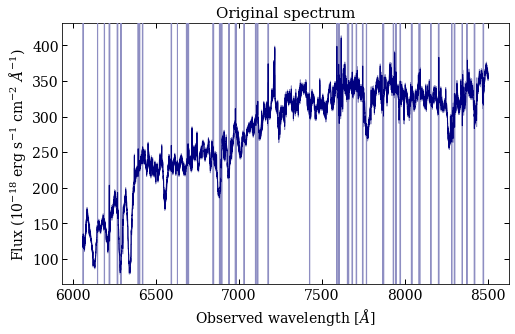

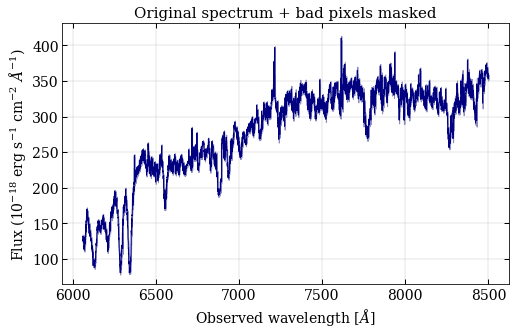

In [5]:
plot_raw   = plot.spectrum_simple(spec_raw[0], spec_raw[1], spec_raw[2], mask=bad_pixels)
plot_clean = plot.spectrum_simple(wave, flux, ferr)

plot_raw.gca().set_title("Original spectrum", fontsize=15)
plot_raw.gca().set_ylabel(r"Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)")
plot_raw.gca().set_xlabel(r"Observed wavelength [$\AA$]")

plot_clean.gca().set_title("Original spectrum + bad pixels masked", fontsize=15)
plot_clean.gca().set_ylabel(r"Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)")
plot_clean.gca().set_xlabel(r"Observed wavelength [$\AA$]")

plot_clean.gca().grid(color="silver", lw=.4)

*Optional.* By importing the `IndexLibrary` class, we can have a first look at the available indices and their keys to be passed to pyLick. The full library of the available indices can be retrieved by setting `keys=None`. In the documentation, we also provide a separate tutorial on how to define and measure a *new* set of spectral indices with pyLick.

In [6]:
from pylick.indices import IndexLibrary

index_keys = np.arange(22, 47)
lib        = IndexLibrary(index_keys=index_keys)

print(lib)

ID  name     unit      blue               centr              red                tex_name  
-------------------------------------------------------------------------------------------
22  CaII_K   A         3845.000-3880.000  3925.650-3945.000  3950.000-3954.000  CaII~K
23  CaII_H   A         3950.000-3954.000  3959.400-3975.000  3983.000-3993.000  CaII~H
24  D4000    break_nu  3750.000-3950.000     0.000-   0.000  4050.000-4250.000  D4000
25  Dn4000   break_nu  3850.000-3950.000     0.000-   0.000  4000.000-4100.000  D_{n}4000
26  Hdelta_A A         4041.600-4079.750  4083.500-4122.250  4128.500-4161.000  H\delta_A
27  Hdelta_F A         4057.250-4088.500  4091.000-4112.250  4114.750-4137.250  H\delta_F
28  CN1      mag       4080.125-4117.625  4142.125-4177.125  4244.125-4284.125  CN_1
29  CN2      mag       4083.875-4096.375  4142.125-4177.125  4244.125-4284.125  CN_2
30  Ca4227   A         4211.000-4219.750  4222.250-4234.750  4241.000-4251.000  Ca4227
31  G4300    A         4266.37

Now pyLick can work for us! Note that if `z` is not passed, the spectrum is assumed to be already rest frame.

In [7]:
index_keys = np.arange(22, 47)
indices    = Galaxy(filename, index_keys, 
                    wave=wave, flux=flux, ferr=ferr, 
                    mask=None, meas_method='int', z=z, plot=True)

print(indices)

> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
> Index outside of the spectrum (3631.85 < lambda < 5094.27)
Elapsed time: 0.01 s

names           vals       errs 
---------------------------------
CaII_K         2.0039     0.0458
CaII_H        -0.0235     0.0317
D4000          1.4795     0.0008
Dn4000         1.1666     0.0009
Hdelta_A       1.3758     0.0379
Hdelta_F      -0.7634     0.0293
CN1            0.0564     0.0011
CN2            0.0703     0.0012
Ca4227        -0.1843     0.0199
G4300         -0.4446     0.0337
Hgamma_A       0.7180     0.0341
Hgamma_F       1.1900     0.0215
Fe4383        -1.0463     0.0589
Ca4455        -0.1048     0.0290
Fe4531        -0.9484 

Finally, we plot the spectrum with the measured indices. In the following cell, we do it manually by calling variables defined previously. However it can be automatically saved when calling the `Galaxy` class by setting the parameter `plot=True`.

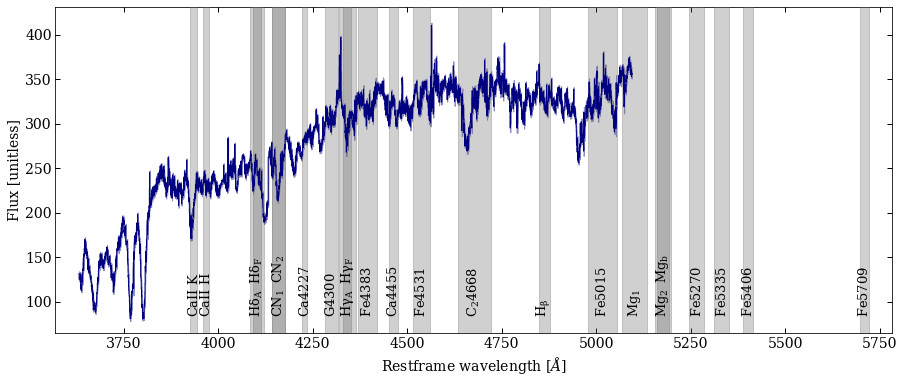

In [8]:
plot_spec = plot.spectrum_with_indices(wave, flux, ferr=ferr, 
                                       index_regions=lib.regions, 
                                       index_names=lib.tex_names, 
                                       index_units=lib.units, 
                                       z=z, mask=None, ax=None, 
                                       index_done=None, 
                                       settings={'figsize': (15,6)})                               

The plot can be further modified. To display only the mesured indices we can pass a boolean mask using `index_done`, while if set `settings['inspect']=True` non-measured indices will be displayed in red. We can also change other properties using the `settings` dictionary. In this last plot we will display the original (raw) spectrum and its bad pixels.

(3600.0, 5450.0)

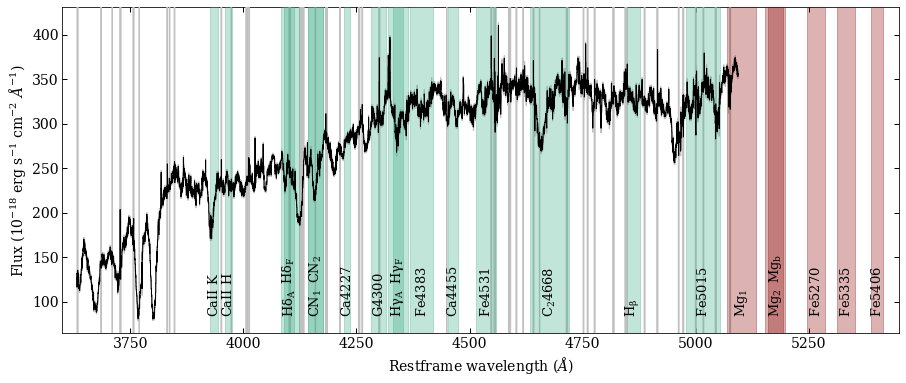

In [9]:
index_done    = np.isfinite(indices.vals)
user_plParams = {'figsize': (15,6),
                'xlab': r"Restframe wavelength ($\AA$)",
                'ylab': r"Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)",
                # Colors of: flux, ferr, indices
                'spec_colors': ['k', 'silver', '#33A980'],
                # Fontsizes of: title, labels, indices 
                'spec_fontsizes': [14, 14, 13],
                'format': '.pdf',
                # Debug
                'inspect': True,
                }
                
plot_spec = plot.spectrum_with_indices(spec_raw[0], spec_raw[1], ferr=spec_raw[2], 
                                       index_regions=lib.regions, 
                                       index_names=lib.tex_names, 
                                       index_units=lib.units, 
                                       z=z, mask=bad_pixels, ax=None, 
                                       index_done=index_done, 
                                       settings=user_plParams)
plot_spec.gca().set_xlim(3600, 5450)